In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# Load the main country-level vaccination dataset
df_vax = pd.read_csv("country_vaccinations.csv")

# Inspect first few rows
df_vax.head()



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
df_vax = df_vax.dropna(subset=['total_vaccinations_per_hundred'])


In [5]:
df_vax['date'] = pd.to_datetime(df_vax['date'])


In [6]:
df_vax[['country','date','total_vaccinations_per_hundred','people_fully_vaccinated_per_hundred']].head()


,country,date,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,0.00,NaN
6,Afghanistan,2021-02-28,0.02,NaN
22,Afghanistan,2021-03-16,0.14,NaN
44,Afghanistan,2021-04-07,0.30,NaN
59,Afghanistan,2021-04-22,0.60,NaN


In [7]:
# Sort by country and date
df_vax = df_vax.sort_values(['country', 'date'])

# Keep only the latest row for each country
latest_vax = df_vax.groupby('country').tail(1)

# Inspect the result
latest_vax[['country','date','total_vaccinations_per_hundred','people_fully_vaccinated_per_hundred']].head()


,country,date,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred
393,Afghanistan,2022-03-22,14.44,11.10
832,Albania,2022-03-24,95.87,42.30
1237,Algeria,2022-03-09,30.72,13.70
1650,Andorra,2022-03-13,196.50,68.99
2040,Angola,2022-03-25,51.68,17.66


In [8]:
# Top 10 countries by total vaccinations per hundred
top10 = latest_vax.nlargest(10, 'total_vaccinations_per_hundred')
print("Top 10 countries by coverage:")
print(top10[['country','total_vaccinations_per_hundred']])

# Bottom 10 countries by total vaccinations per hundred
bottom10 = latest_vax.nsmallest(10, 'total_vaccinations_per_hundred')
print("\nBottom 10 countries by coverage:")
print(bottom10[['country','total_vaccinations_per_hundred']])


Top 10 countries by coverage:
                    country  total_vaccinations_per_hundred
30235             Gibraltar                          345.37
19243                  Cuba                          312.28
15755                 Chile                          261.82
57358                  Niue                          257.81
70228             Singapore                          253.51
81916  United Arab Emirates                          244.86
49111                 Malta                          243.33
11745                Brunei                          241.99
32323              Guernsey                          237.79
72973           South Korea                          235.07

Bottom 10 countries by coverage:
                            country  total_vaccinations_per_hundred
12644                       Burundi                            0.10
20825  Democratic Republic of Congo                            1.04
33669                         Haiti                            2.16
1530

/tmp/ipython-input-831961518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


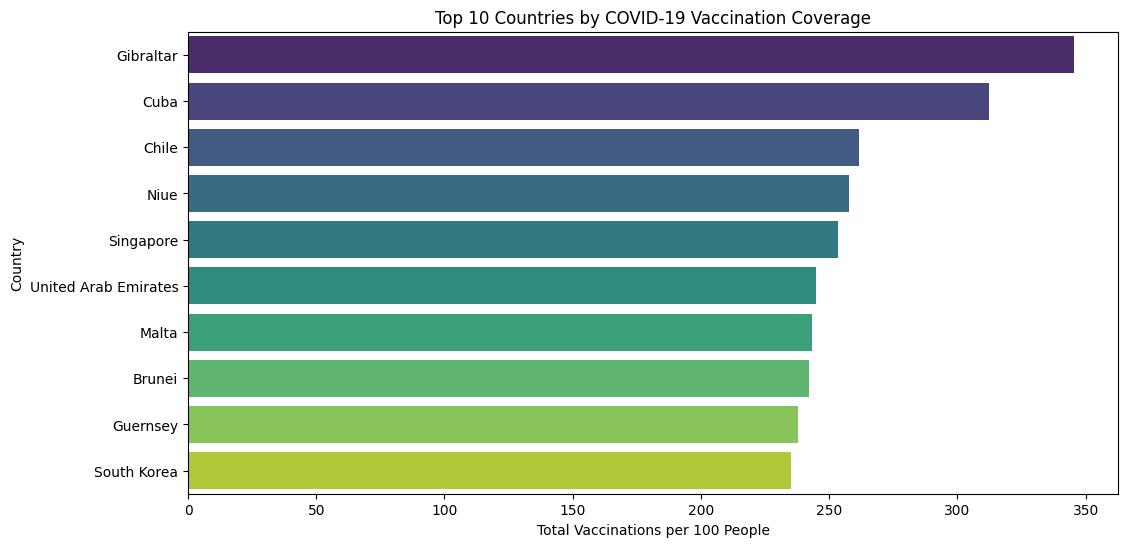

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x='total_vaccinations_per_hundred',
    y='country',
    data=top10,
    palette='viridis'
)
plt.xlabel("Total Vaccinations per 100 People")
plt.ylabel("Country")
plt.title("Top 10 Countries by COVID-19 Vaccination Coverage")
plt.show()


/tmp/ipython-input-851228200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


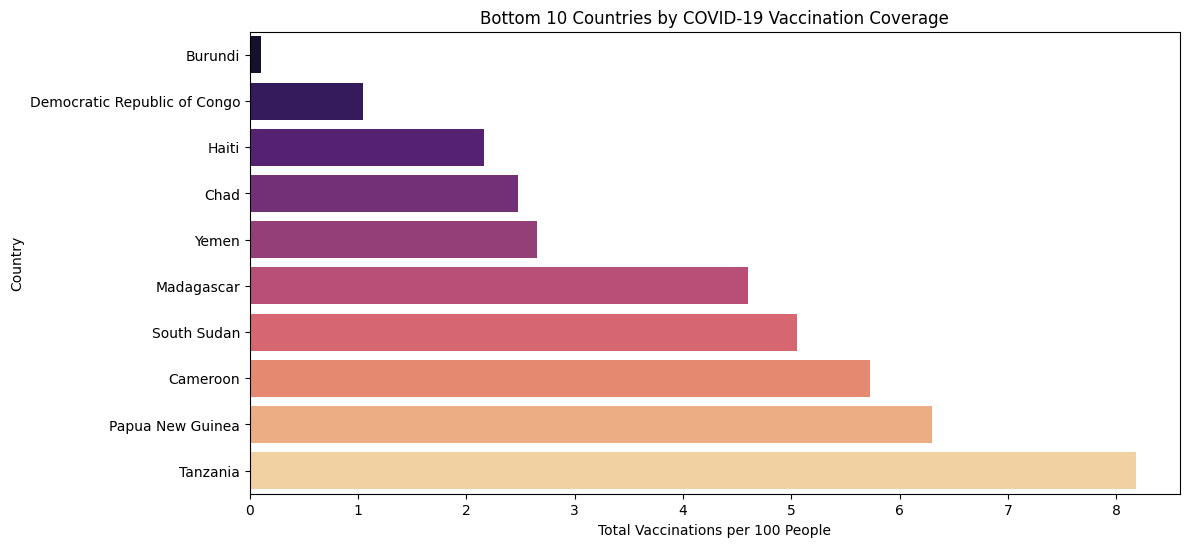

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='total_vaccinations_per_hundred',
    y='country',
    data=bottom10,
    palette='magma'
)
plt.xlabel("Total Vaccinations per 100 People")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by COVID-19 Vaccination Coverage")
plt.show()


In [11]:
import plotly.express as px

fig = px.choropleth(
    latest_vax,
    locations='country',
    locationmode='country names',
    color='total_vaccinations_per_hundred',
    hover_name='country',
    color_continuous_scale='Viridis',
    title="Global COVID-19 Vaccination Coverage per 100 People"
)
fig.show()


In [13]:
# Example mapping for demonstration (add more countries as needed)
continent_dict = {
    'Afghanistan': 'Asia',
    'United States': 'North America',
    'India': 'Asia',
    'Brazil': 'South America',
    'Germany': 'Europe',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    # ... you can add all countries you need
}

# Map continent column
latest_vax['continent'] = latest_vax['country'].map(continent_dict)


/tmp/ipython-input-2516567278.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Check for countries that didn’t get mapped
latest_vax[latest_vax['continent'].isnull()]['country']


,country
832,Albania
1237,Algeria
1650,Andorra
2040,Angola
2455,Anguilla
...,...
85073,Wales
85444,Wallis and Futuna
85756,Yemen
86106,Zambia


In [15]:
# Now you can calculate average coverage per continent
continent_avg = latest_vax.groupby('continent')['total_vaccinations_per_hundred'].mean().reset_index()
print(continent_avg)


       continent  total_vaccinations_per_hundred
0         Africa                           35.31
1           Asia                           73.05
2         Europe                          204.93
3  North America                          168.72
4  South America                          193.26


Africa’s average coverage is significantly lower than Europe and South America, highlighting the urgent need for equitable vaccine distribution.

/tmp/ipython-input-1112911496.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




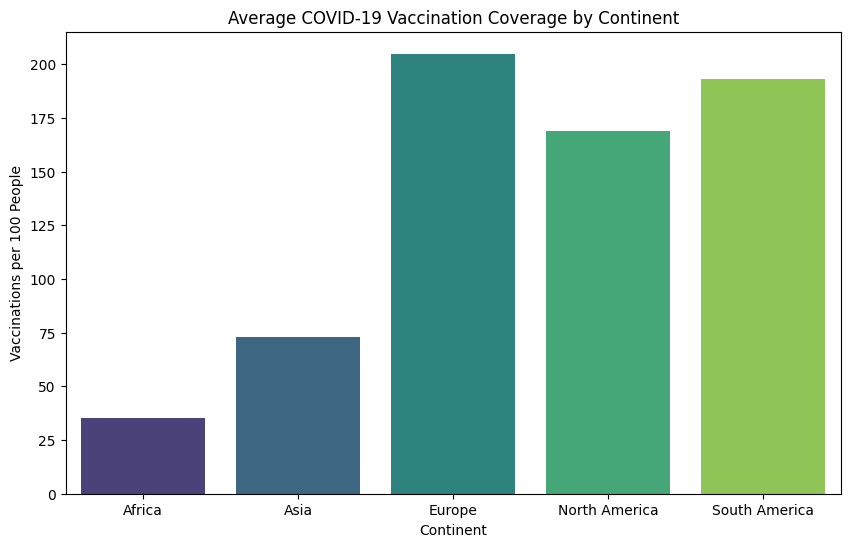

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x="continent", y="total_vaccinations_per_hundred", data=continent_avg, palette="viridis")
plt.title("Average COVID-19 Vaccination Coverage by Continent")
plt.ylabel("Vaccinations per 100 People")
plt.xlabel("Continent")
plt.show()


In [19]:
# Group by continent and calculate average fully vaccinated per hundred
continent_full_vax = latest_vax.groupby("continent")["people_fully_vaccinated_per_hundred"].mean().reset_index()
continent_full_vax


,continent,people_fully_vaccinated_per_hundred
0,Africa,17.11
1,Asia,35.27
2,Europe,75.26
3,North America,65.51
4,South America,74.90


Africa has the lowest fully vaccinated coverage, highlighting equity gaps.

Europe and South America have high full vaccination rates, showing strong rollout.

Comparing total vaccinated vs fully vaccinated can show countries stuck at partial vaccination.

/tmp/ipython-input-1774923345.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




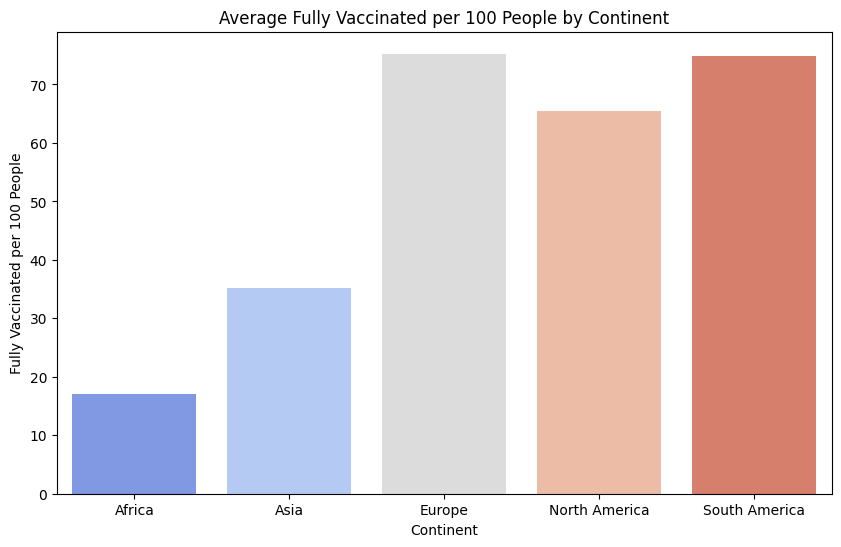

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x="continent",
    y="people_fully_vaccinated_per_hundred",
    data=continent_full_vax,
    palette="coolwarm"
)
plt.title("Average Fully Vaccinated per 100 People by Continent")
plt.ylabel("Fully Vaccinated per 100 People")
plt.xlabel("Continent")
plt.show()


In [21]:
# Avoid division by zero by replacing NaN in total_vaccinations_per_hundred with 0
latest_vax['total_vaccinations_per_hundred'] = latest_vax['total_vaccinations_per_hundred'].fillna(0)
latest_vax['people_fully_vaccinated_per_hundred'] = latest_vax['people_fully_vaccinated_per_hundred'].fillna(0)

# Ratio = fully vaccinated / total vaccinated
latest_vax['full_vax_ratio'] = latest_vax['people_fully_vaccinated_per_hundred'] / latest_vax['total_vaccinations_per_hundred']

# Cap ratio at 1 (100%) in case of rounding issues
latest_vax['full_vax_ratio'] = latest_vax['full_vax_ratio'].clip(0,1)

# Inspect top 10 ratios
latest_vax[['country','full_vax_ratio']].sort_values(by='full_vax_ratio', ascending=False).head(10)


/tmp/ipython-input-2008879546.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2008879546.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2008879546.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-200

,country,full_vax_ratio
44703,Liberia,0.897072
15019,Central African Republic,0.886353
28592,Gambia,0.875428
73326,South Sudan,0.839604
47149,Madagascar,0.804348
44385,Lesotho,0.803529
12644,Burundi,0.800000
17308,Congo,0.781768
393,Afghanistan,0.768698
8575,Benin,0.729174


In [22]:
continent_ratio = latest_vax.groupby('continent')['full_vax_ratio'].mean().reset_index()
continent_ratio


,continent,full_vax_ratio
0,Africa,0.418461
1,Asia,0.610082
2,Europe,0.367247
3,North America,0.388276
4,South America,0.387561


/tmp/ipython-input-2187690913.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




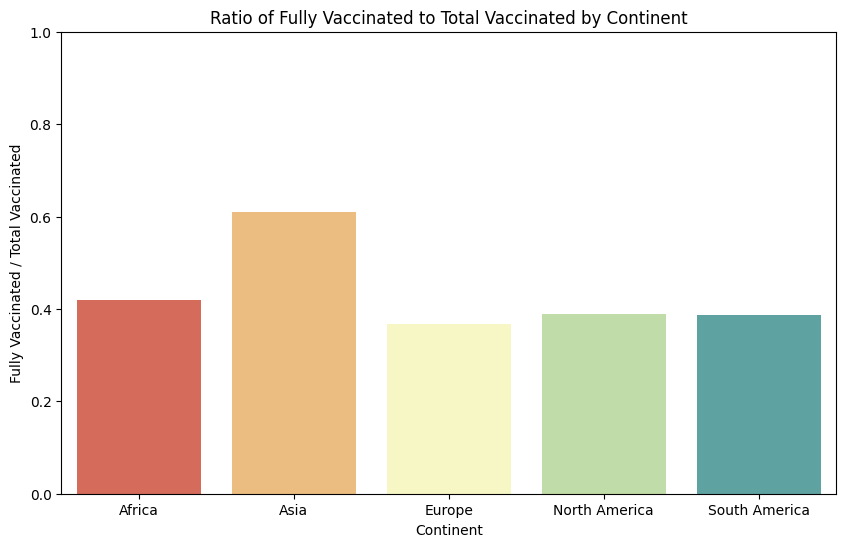

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='continent',
    y='full_vax_ratio',
    data=continent_ratio,
    palette='Spectral'
)
plt.title("Ratio of Fully Vaccinated to Total Vaccinated by Continent")
plt.ylabel("Fully Vaccinated / Total Vaccinated")
plt.xlabel("Continent")
plt.ylim(0,1)  # 0% to 100%
plt.show()


In [25]:
sample_countries = ['United States', 'India', 'Nigeria', 'Brazil', 'Germany']
df_sample = df_vax[df_vax['country'].isin(sample_countries)]


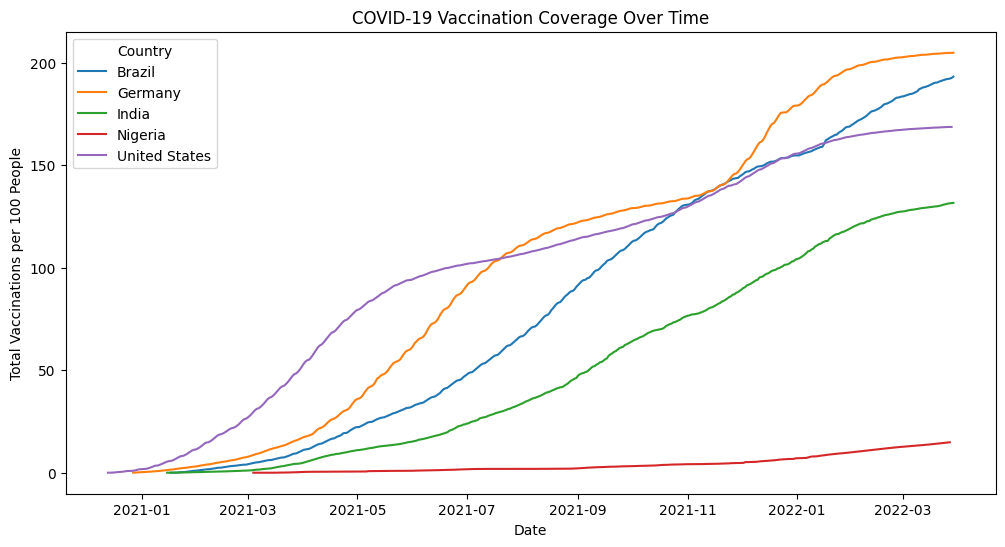

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(
    x='date',
    y='total_vaccinations_per_hundred',
    hue='country',
    data=df_sample
)
plt.title("COVID-19 Vaccination Coverage Over Time")
plt.ylabel("Total Vaccinations per 100 People")
plt.xlabel("Date")
plt.legend(title='Country')
plt.show()


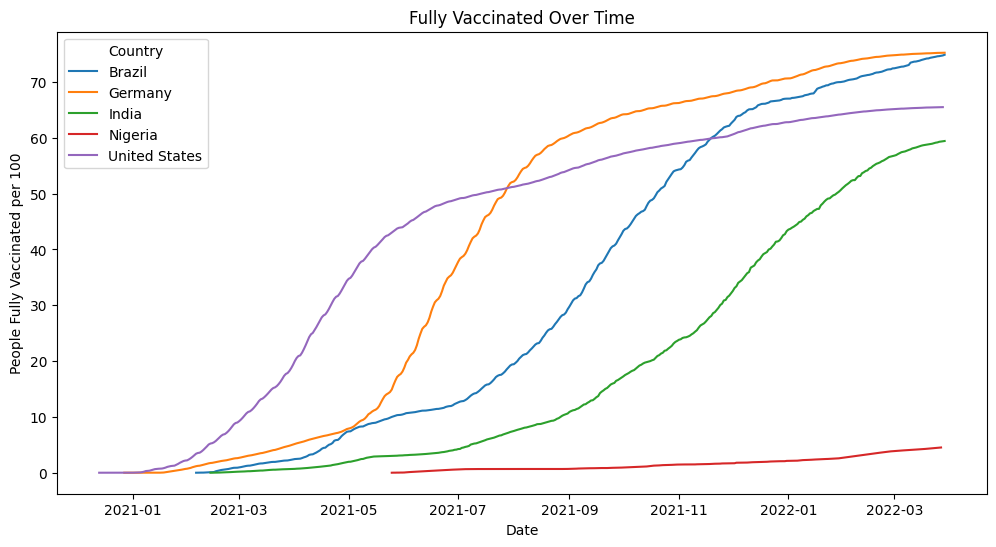

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x='date',
    y='people_fully_vaccinated_per_hundred',
    hue='country',
    data=df_sample
)
plt.title("Fully Vaccinated Over Time")
plt.ylabel("People Fully Vaccinated per 100")
plt.xlabel("Date")
plt.legend(title='Country')
plt.show()
